# Importing_libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics

# Importing dataset

In [2]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2023-06-20 16:20:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  35.20K  --.-KB/s    in 0.001s  

2023-06-20 16:20:35 (36.1 MB/s) - ‘teleCust1000t.csv’ saved [36047/36047]



In [3]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


#Data Exploration

In [4]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [5]:
df.shape

(1000, 12)

In [6]:
# summarize the data
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


Visualizing the data
All the values are numerical and continuous values. We can plot each of these features:

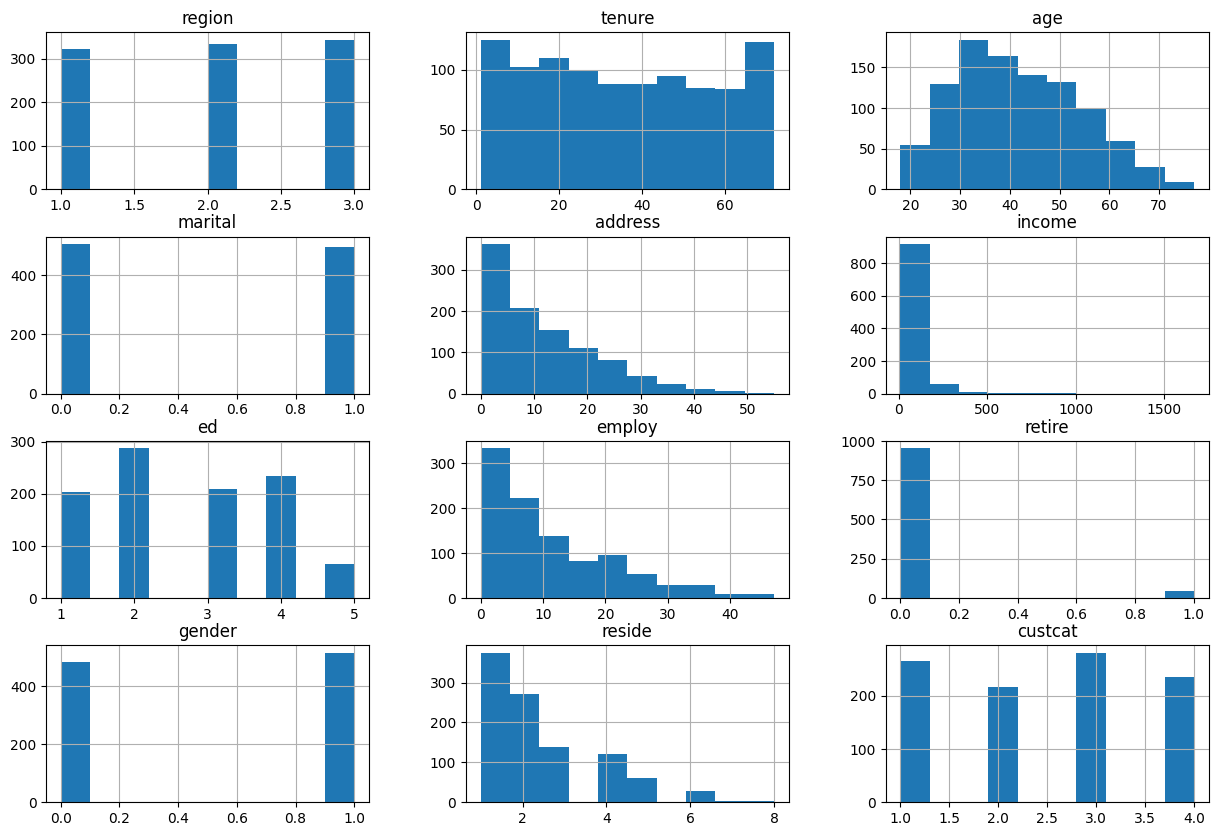

In [8]:
df.hist(figsize=(15, 10))
plt.show()

In [9]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

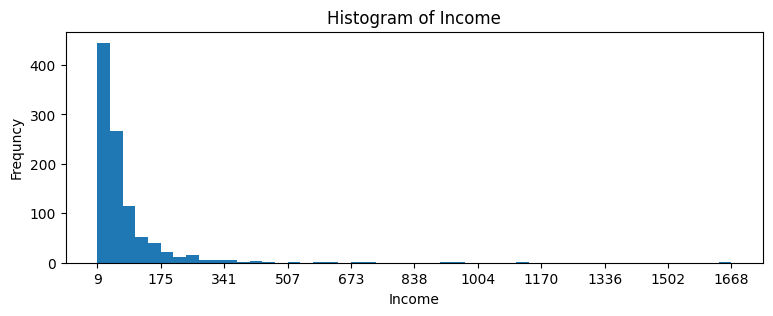

In [10]:
count, bins_edge = np.histogram(df['income'], 10) #number of sequence
df['income'].plot(kind = 'hist', figsize = (9,3), bins = 50, xticks = bins_edge)
plt.title('Histogram of Income')
plt.ylabel('Frequncy')
plt.xlabel('Income')
plt.show()

In [11]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [12]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']].astype(float)
y = df[['custcat']].astype(float)

In [13]:
x[0:10]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2.0,13.0,44.0,1.0,9.0,64.0,4.0,5.0,0.0,0.0,2.0
1,3.0,11.0,33.0,1.0,7.0,136.0,5.0,5.0,0.0,0.0,6.0
2,3.0,68.0,52.0,1.0,24.0,116.0,1.0,29.0,0.0,1.0,2.0
3,2.0,33.0,33.0,0.0,12.0,33.0,2.0,0.0,0.0,1.0,1.0
4,2.0,23.0,30.0,1.0,9.0,30.0,1.0,2.0,0.0,0.0,4.0
5,2.0,41.0,39.0,0.0,17.0,78.0,2.0,16.0,0.0,1.0,1.0
6,3.0,45.0,22.0,1.0,2.0,19.0,2.0,4.0,0.0,1.0,5.0
7,2.0,38.0,35.0,0.0,5.0,76.0,2.0,10.0,0.0,0.0,3.0
8,3.0,45.0,59.0,1.0,7.0,166.0,4.0,31.0,0.0,0.0,5.0
9,1.0,68.0,41.0,1.0,21.0,72.0,1.0,22.0,0.0,0.0,3.0


In [14]:
y[0:10]

,custcat
0,1.0
1,4.0
2,3.0
3,1.0
4,3.0
5,3.0
6,2.0
7,4.0
8,3.0
9,2.0


# Data Standardization

In [15]:
xs = preprocessing.StandardScaler().fit_transform(x)

In [16]:
xs

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [17]:
y = y.values


# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
xs_train, xs_test, y_train, y_test = train_test_split(xs, y, test_size=0.2, random_state=4)

In [19]:
print('train: ', xs_train.shape, y_train.shape)
print('test: ', xs_test.shape, y_test.shape)

train:  (800, 11) (800, 1)
test:  (200, 11) (200, 1)


#Classification


###K nearest neighbor (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

###Train Model and Predict

In [21]:
k = 4
model = KNeighborsClassifier(n_neighbors = k).fit(xs_train,y_train)
model

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [22]:
y_pred = model.predict(xs_test)

calculate the accuracy of KNN for different values of k

It is calculating the standard deviation of whether the predictions matched the true labels (yhat == y_test) and dividing by the square root of the number of test samples.

In [23]:
k_range = 10
accuracy = np.zeros((k_range-1))
std = np.zeros((k_range-1))

for k in range(1, k_range):
  model = KNeighborsClassifier(n_neighbors = k).fit(xs_train,y_train)
  y_pred = model.predict(xs_test)
  accuracy[k-1] = metrics.accuracy_score(y_test, y_pred)
  std[k-1] = np.std(y_pred == y_test) / np.sqrt(y_pred.shape[0]) #or np.sqrt(np.count_nonzero(y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

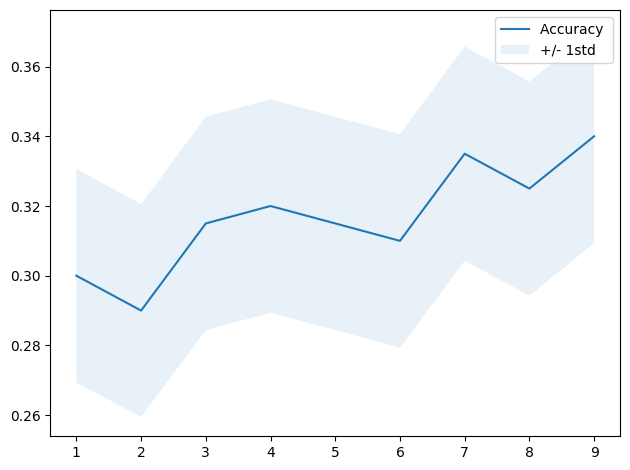

In [24]:
plt.plot(range(1,k_range), accuracy)
plt.fill_between (range(1,k_range), accuracy-1*std, accuracy+1*std, alpha=0.10)
plt.legend(('Accuracy ', '+/- 1std'))
plt.tight_layout() #Adjust the padding between and around subplots.
plt.show()

# Evaluation

In [25]:
from sklearn import metrics
accuracy_train = metrics.accuracy_score(y_train, model.predict(xs_train))
accuracy_test = metrics.accuracy_score(y_test, y_pred)
print(f"accuracy_train: {accuracy_train*100}%")
print(f"accuracy_test: {accuracy_test*100}%")

accuracy_train: 50.24999999999999%
accuracy_test: 34.0%


In [26]:
print(f"The best accuracy is: {accuracy.max()} and the best K is: {accuracy.argmax()+1}") #argmax Returns the indices of the maximum values along an axis.

The best accuracy is: 0.34 and the best K is: 9
